<p style="font: 30px Georgia; 
          color: black;
          text-decoration: underline;
          font-style: oblique;
          text-align: center;
          padding:30px; 
          border: 2px solid black;
          background-color:BlanchedAlmond"> 
    Parkinson's Disease Detection and Analysis Using Machine Learning
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    IMPORTING THE REQUIRED LIBRARIES 
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("D:\MAJOR PROJECT\Dataset\Parkinson Desease EEG.csv")

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    THE DATASET 
</p>

<div style="font: 15px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:10px; 
          border: 1px solid black;
          background-color:whitesmoke"> 
    <ul>
        <li style="padding:5px;">
            The Original Dataset was collected from <b>UCI Machine Learning Repository.</b>
        </li>
        <li style="padding:5px;">
            It consists of 5 different folders, each with 100 files, with each file representing a single subject/person.
        </li>
        <li style="padding:5px;">
            Each file is a recording of brain activity for <b>23.6 seconds.</b>
        </li>
        <li style="padding:5px;">
            The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.
        </li>
        <li style="padding:5px;">
            We divided and shuffled every 4097 data points into 23 chunks, each chunk contains <b>178 data points </b>for 1 second, and each data point is the value of the EEG recording at a different point in time.
        </li>
        <li style="padding:5px;">
            So now we have <b>23 x 500 = 11500 pieces of information(row)</b>, each information contains 178 data points for 1 second(column), <b>the last column represents the label y {1,2,3,4,5}.</b>
        </li>
        <li style="padding:5px;">
            The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178
        </li>
        <li style="padding:5px;">
            <b>What is y?</b>
            <ul>
                <li>
                    y contains the category of the 178-dimensional input vector. Specifically y is {1, 2, 3, 4, 5}.
                </li>
                <li>
                    1 - Recording of Seizure activity.
                </li>
                <li>
                    2 - Recording of the EEG from the area where the tumor was located.
                </li>
                <li>
                    3 - Recording of the EEG from the healthy brain area.
                </li>
                <li>
                    4 - Eyes Closed, means when they were recording the EEG signal the patient had their eyes closed.
                </li>
                <li>
                    5 - Eyes Open, means when they were recording the EEG signal the patient had their eyes open.
                </li>
            </ul>
        </li>
    </ul>
         
</div>

In [3]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    EXPLORATORY DATA ANALYSIS 
</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,11500.0,-11.581391,165.626284,-1839.0,-54.0,-8.0,34.0,1726.0
X2,11500.0,-10.911565,166.059609,-1838.0,-55.0,-8.0,35.0,1713.0
X3,11500.0,-10.187130,163.524317,-1835.0,-54.0,-7.0,36.0,1697.0
X4,11500.0,-9.143043,161.269041,-1845.0,-54.0,-8.0,36.0,1612.0
X5,11500.0,-8.009739,160.998007,-1791.0,-54.0,-8.0,35.0,1518.0
...,...,...,...,...,...,...,...,...
X175,11500.0,-13.045043,164.241019,-1863.0,-56.0,-9.0,34.0,1958.0
X176,11500.0,-12.705130,162.895832,-1781.0,-55.0,-9.0,34.0,2047.0
X177,11500.0,-12.426000,162.886311,-1727.0,-55.0,-9.0,34.0,2047.0
X178,11500.0,-12.195652,164.852015,-1829.0,-55.0,-9.0,34.0,1915.0


In [6]:
# info about the dependent variable y in the dataset
df['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [7]:
#check for any missing value in the dataset
df.isnull().sum().sum()

0

### Making the y target variable as a Binary Classification
### 1: Parkinson
### 0: Non-Parkinson

In [8]:
df.loc[df.y!=1, 'y']=0

In [9]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


In [10]:
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

### Removing Unnamed Column as is of no use.

In [11]:
df = df.drop('Unnamed', axis = 1)

In [12]:
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
5,55,28,18,16,16,19,25,40,52,66,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,0
6,-55,-9,52,111,135,129,103,72,37,0,...,-125,-99,-79,-62,-41,-26,11,67,128,0
7,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,0
8,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,8,15,13,3,-6,-8,-5,4,25,41,...,49,31,11,-5,-17,-19,-15,-15,-11,0


In [13]:
# Description of Non Parkinson
df[df['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [14]:
# Description of Parkinson
df[df['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    DATA VISUALIZATION 
</p>

## Plotting Some Parkinson's Patient EEG

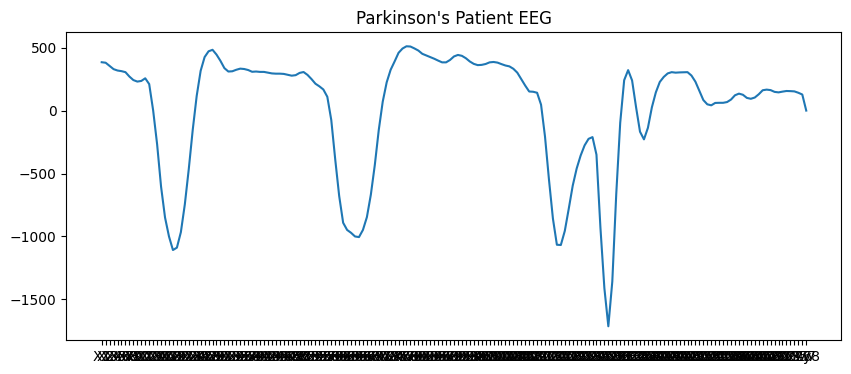

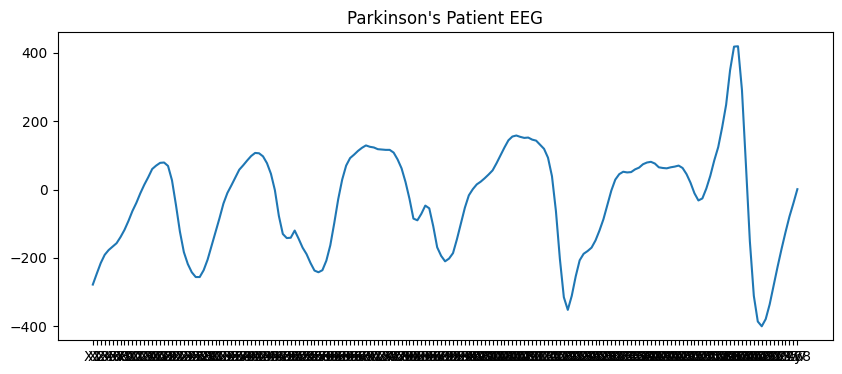

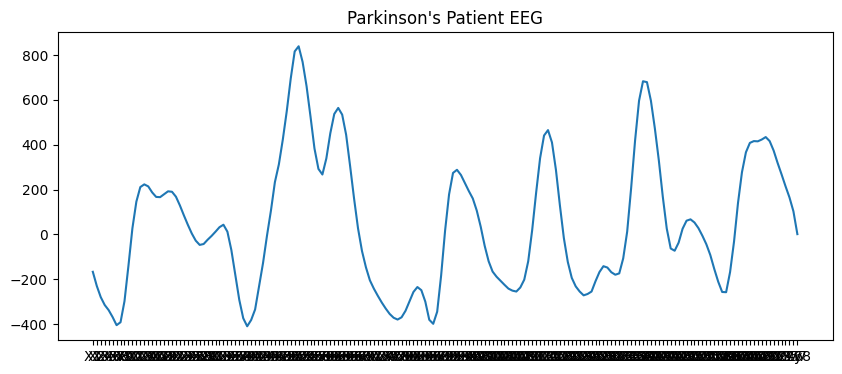

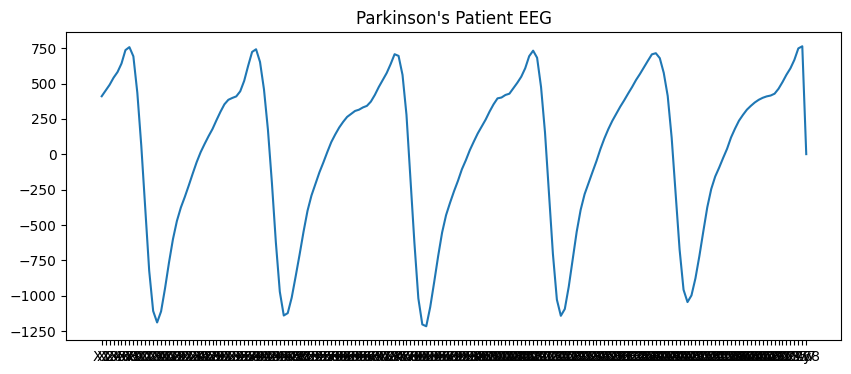

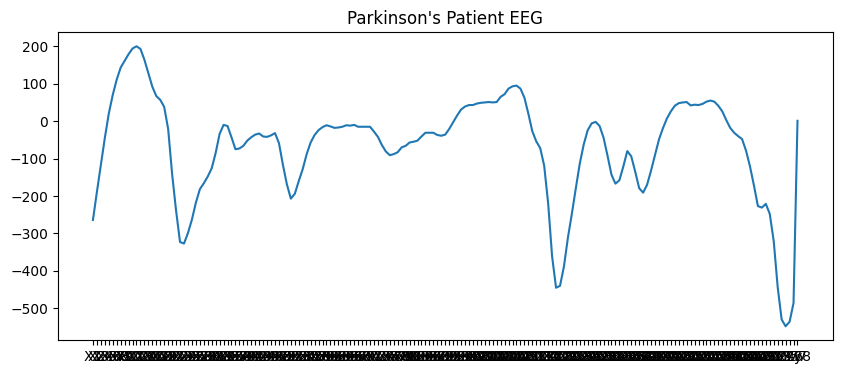

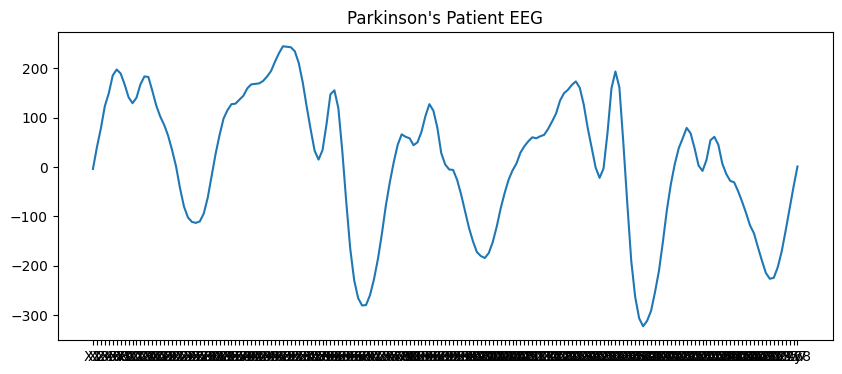

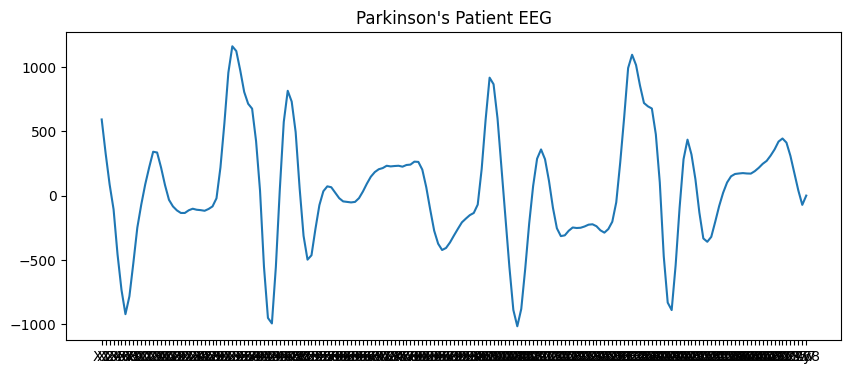

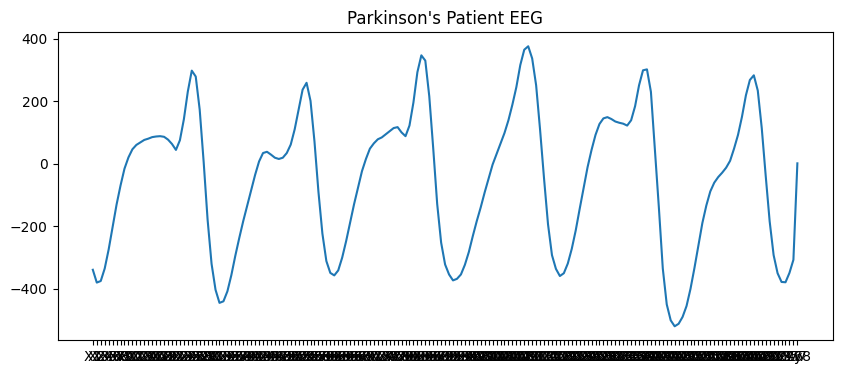

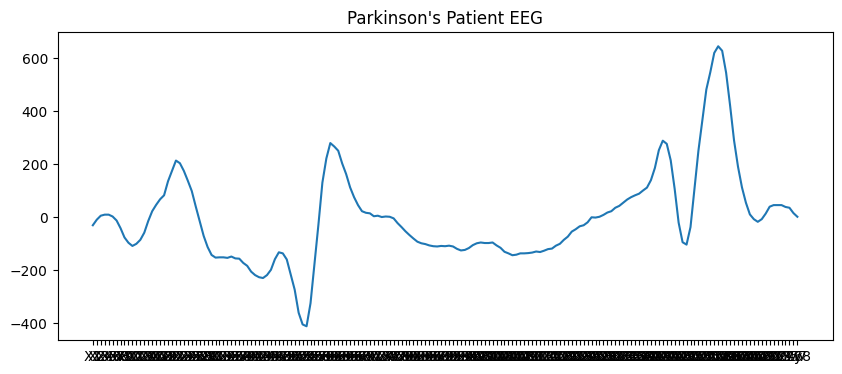

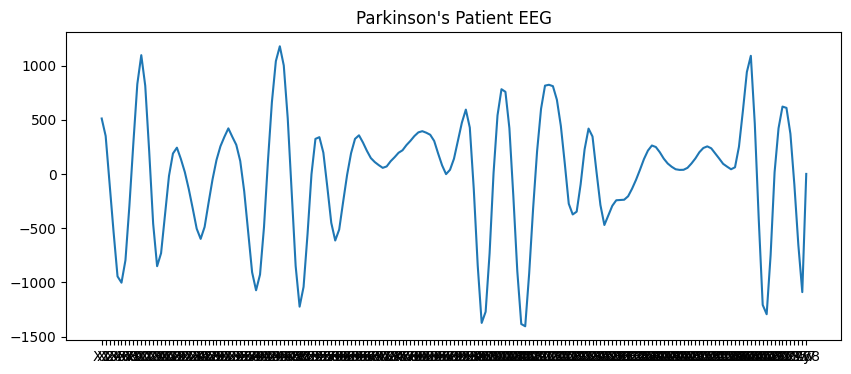

In [15]:
for i in range(10):
    plt.figure(figsize=(10,4)), plt.title('Parkinson\'s Patient EEG')
    plt.plot(df[df['y'] == 1].iloc[i][:])

## Plotting Some Non-Parkinson's Patient EEG

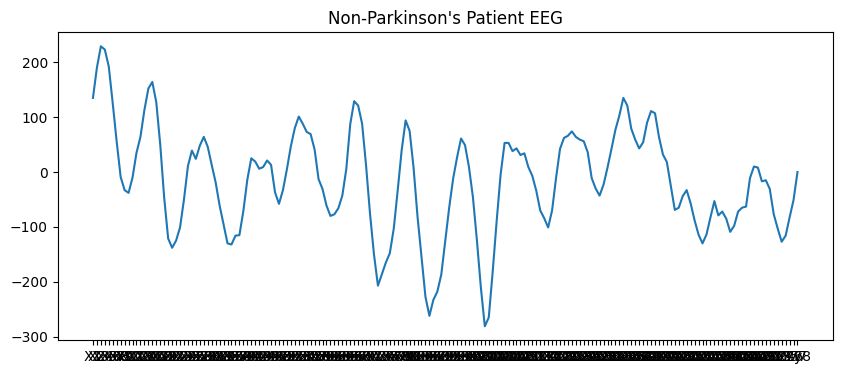

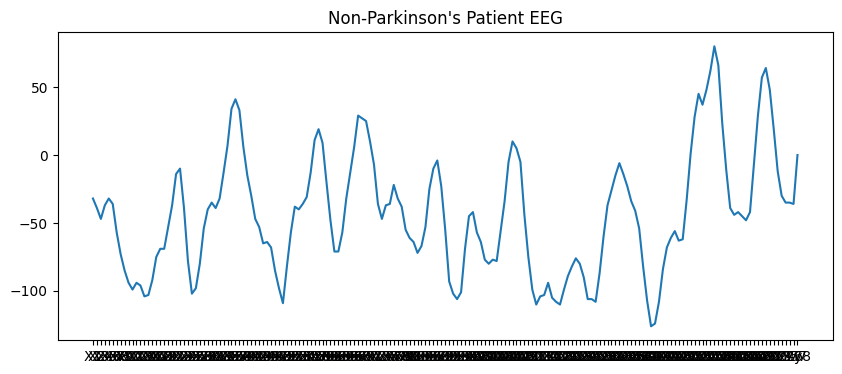

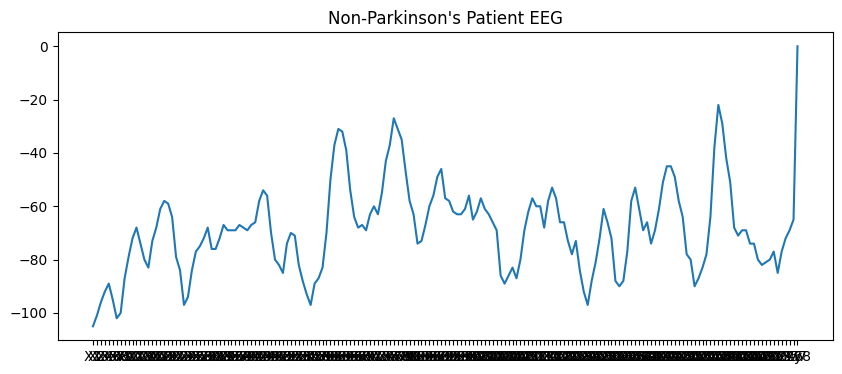

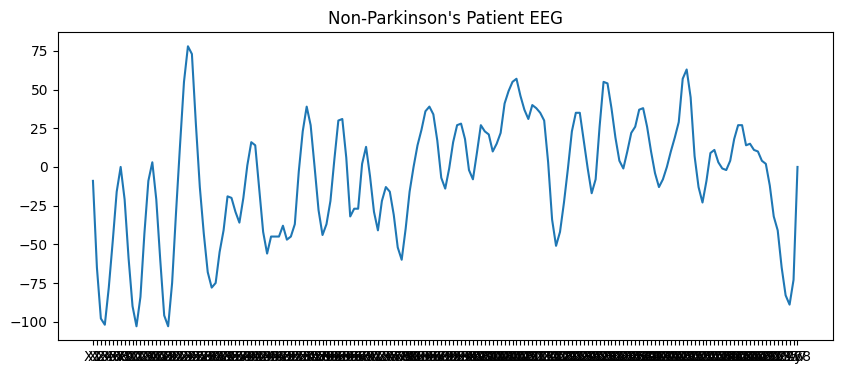

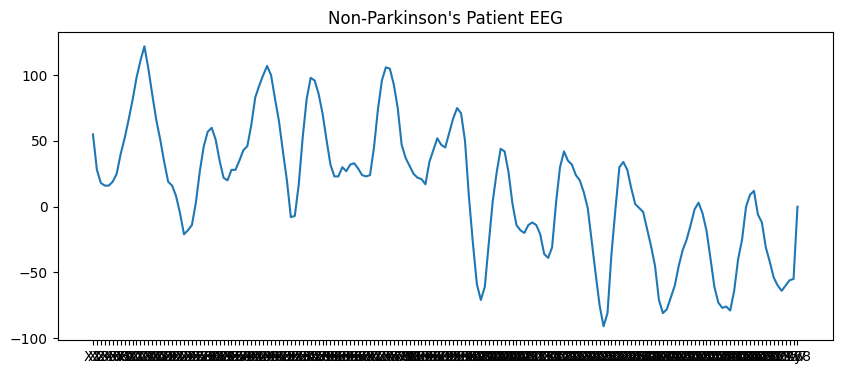

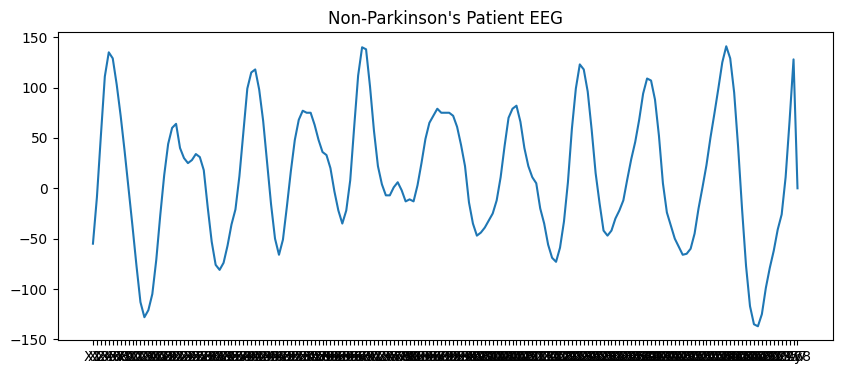

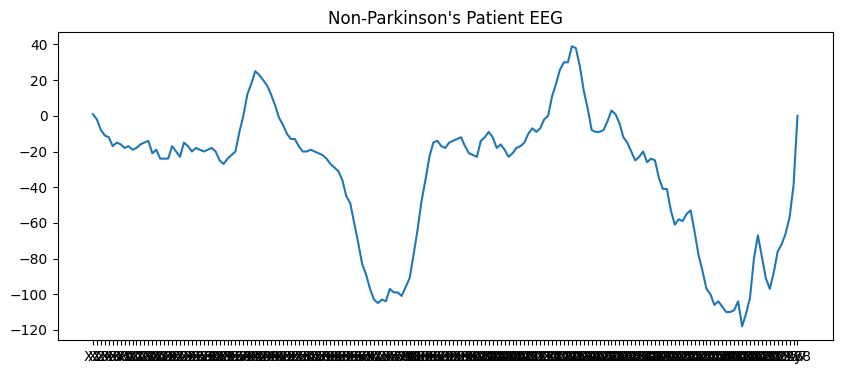

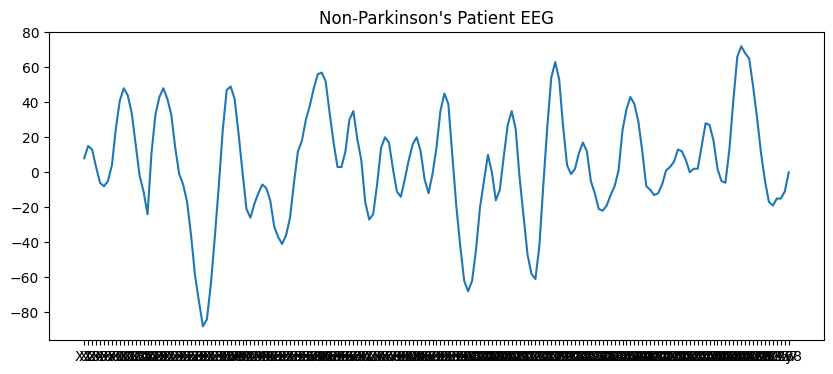

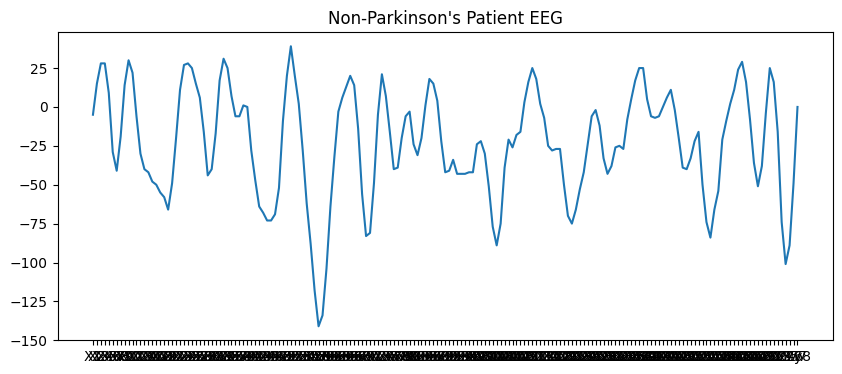

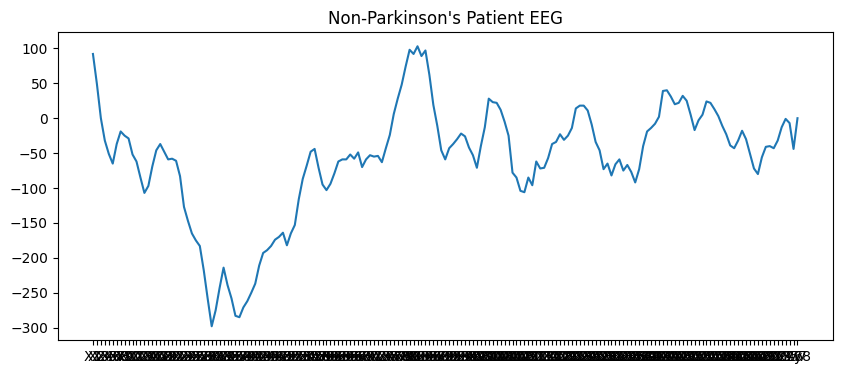

In [16]:
for i in range(10):
    plt.figure(figsize=(10,4)), plt.title('Non-Parkinson\'s Patient EEG')
    plt.plot(df[df['y'] == 0].iloc[i][:])

## Scatter Plot for Parkinson's and Non-Parkinson's Occurences

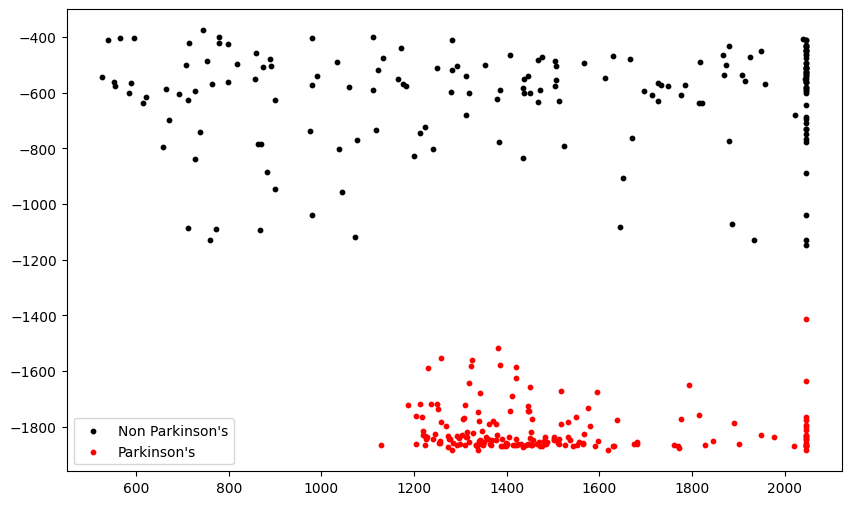

In [17]:
# lists of arrays containing all data without y column
non_parkinson = [df[df['y']==0].iloc[:, range(0, len(df.columns)-1)].values]
parkinson = [df[df['y']==1].iloc[:, range(0, len(df.columns)-1)].values]

# 2D indicators in order plot data in 2 dimensions
# Using just min and max values
def indic(df):
    max = np.max(df, axis=1)
    min = np.min(df, axis=1)
    return max, min

x1,y1 = indic(non_parkinson)
x2,y2 = indic(parkinson)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot()

ax1.scatter(x1, y1, s=10, c='black', label='Non Parkinson\'s')
ax1.scatter(x2, y2, s=10, c='red', label='Parkinson\'s')
plt.legend(loc='lower left');

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    DATA PRE-PROCESSSING 
</p>

In [18]:
X = df.drop('y', axis=1)
Y = df['y']

## <u>Class Imbalance</u>
Since in the dataset the target variable y is highly imbalanced, <br>
using <b> Minority Random Oversampling technique</b> to make the data balanced.

In [20]:
Y.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [21]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [22]:
X_over, Y_over = oversample.fit_resample(X, Y)

In [23]:
Y_over.value_counts()

y
0    9200
1    9200
Name: count, dtype: int64

In [24]:
X = X_over
Y = Y_over

## <u>Splitting of Data for Training and Testing</u>

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [26]:
y_train.value_counts()

y
1    6463
0    6417
Name: count, dtype: int64

In [27]:
y_test.value_counts()

y
0    2783
1    2737
Name: count, dtype: int64

In [28]:
x_train.shape

(12880, 178)

In [29]:
x_test.shape

(5520, 178)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          border: 1px solid black;
          background-color:MistyRose"> 
    MODELS 
</p>

### LIGHT GRADIENT BOOSTING MACHINE MODEL (LightGBM)

In [30]:
# Creating LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

In [31]:
# Set LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'dart',
    'num_leaves': 300,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

In [32]:
# Training the model
model = lgb.train(params, train_data, num_boost_round=300)

In [33]:
# Make predictions on the test set

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

In [34]:
# Evaluating the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9920


In [35]:
# Plotting Feature Importance

feature_value = model.feature_importance()
feature_imp = pd.DataFrame(zip(feature_value,X.columns), columns=['Value','Feature'])

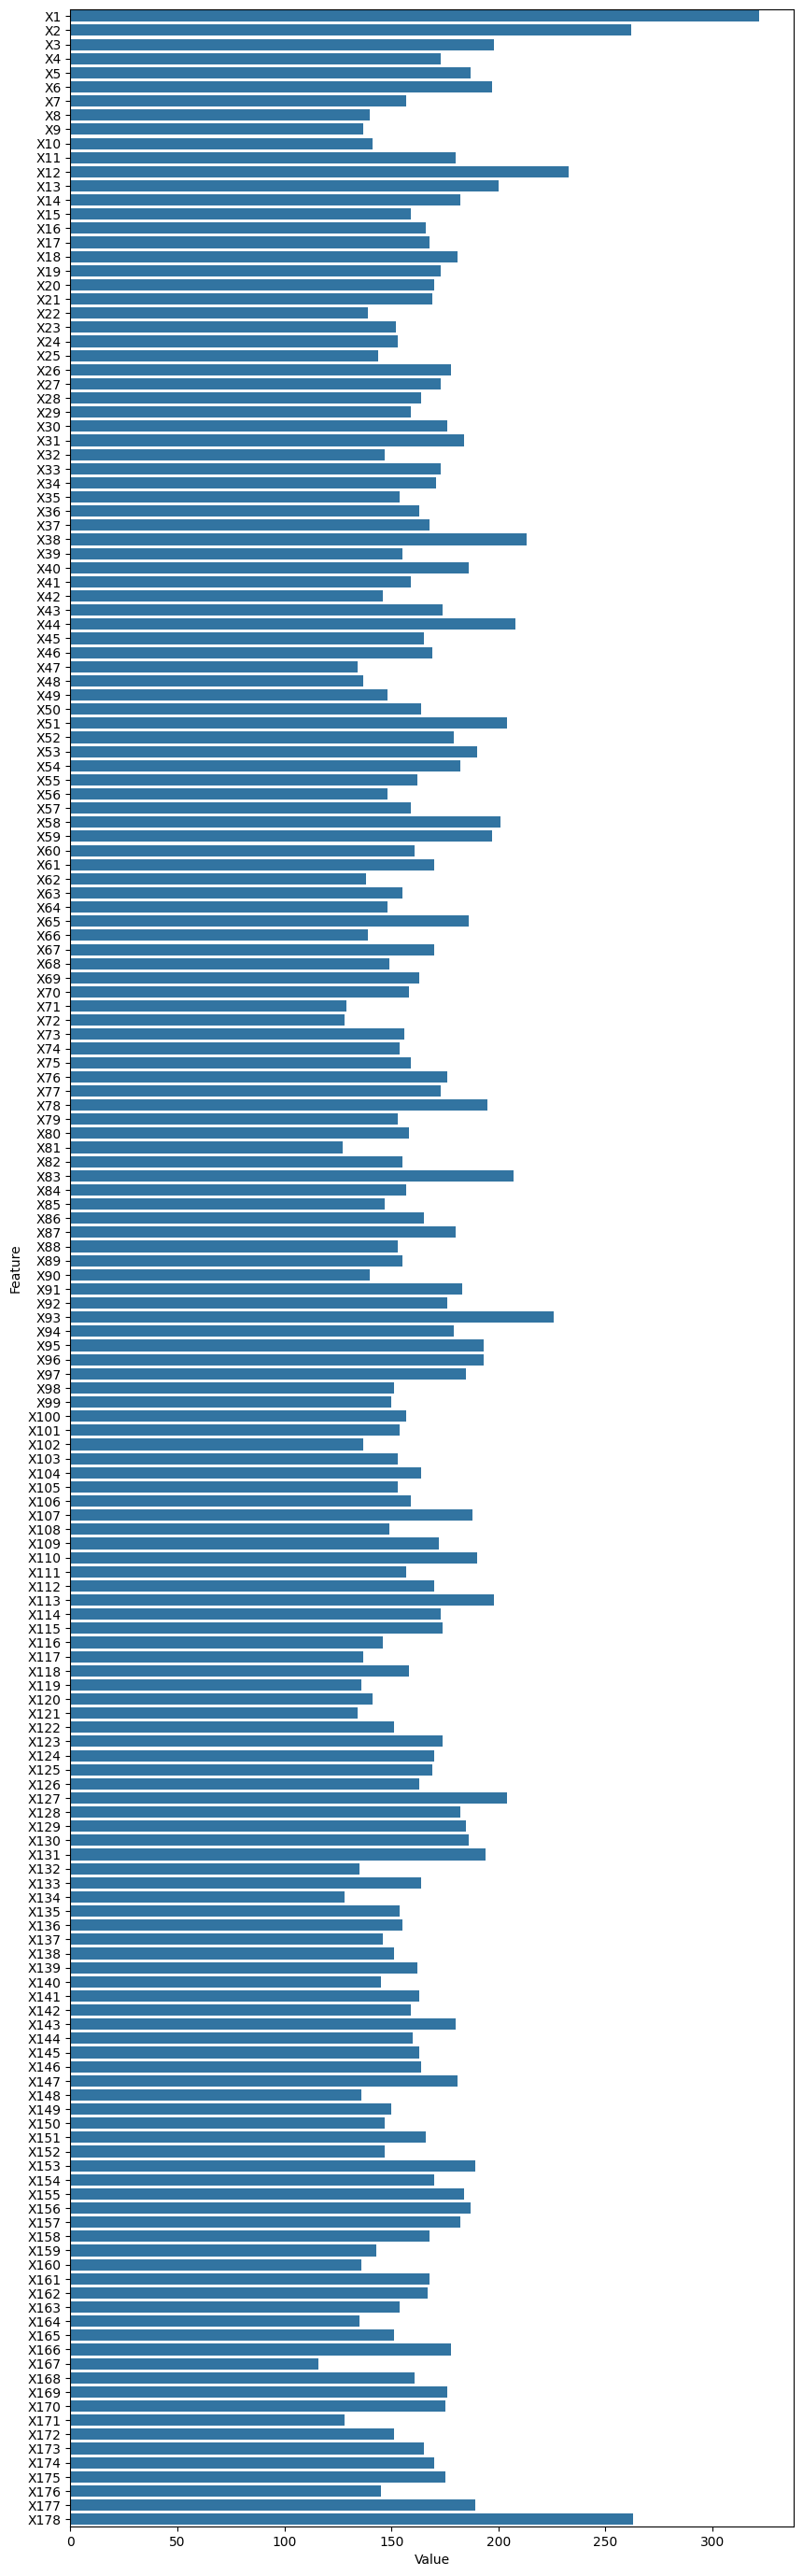

In [36]:
plt.figure(figsize=(10, 35))
sb.barplot(x="Value", y="Feature", data=feature_imp)
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sbb
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[2750   33]
 [  11 2726]]


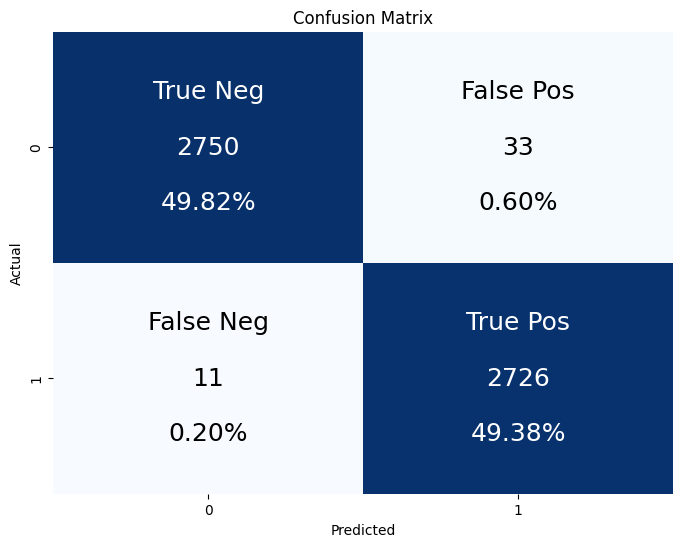

In [38]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Ensure that labels are compatible with the shape of the confusion matrix
labels = np.array(labels).reshape(cf_matrix.shape)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

ax = sb.heatmap(cf_matrix, annot=False, cmap='Blues', cbar=False,
                 xticklabels=['0', '1'][:cf_matrix.shape[1]],
                 yticklabels=['0', '1'][:cf_matrix.shape[0]])

# Set labels individually
ax.text(0.5, 0.5, labels[0, 0], ha='center', va='center', fontsize=18, color='white')
ax.text(1.5, 0.5, labels[0, 1], ha='center', va='center', fontsize=18, color='black')
ax.text(0.5, 1.5, labels[1, 0], ha='center', va='center', fontsize=18, color='black')
ax.text(1.5, 1.5, labels[1, 1], ha='center', va='center', fontsize=18, color='white')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
import pickle

In [40]:
#saving the model as .pkl file
pkl_filename = "D:\MAJOR PROJECT\Model\model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [41]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
y_predict = pickle_model.predict(x_test)
y_predict = (y_predict > 0.5).astype(int)